In [1]:
import numpy as np
import matplotlib.pyplot as plt

(0.0, 15.0)

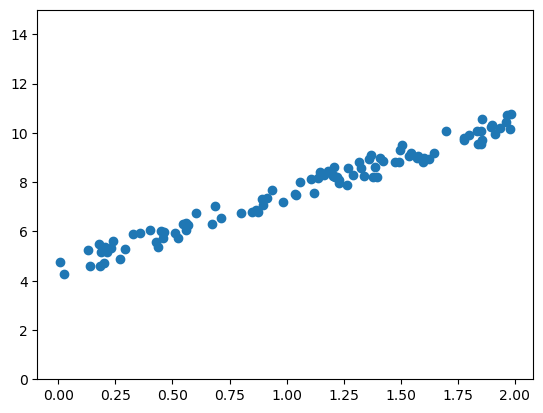

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)
plt.scatter(X, y)
plt.ylim([0, 15])

In [3]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.4846742 ],
       [3.01298502]])

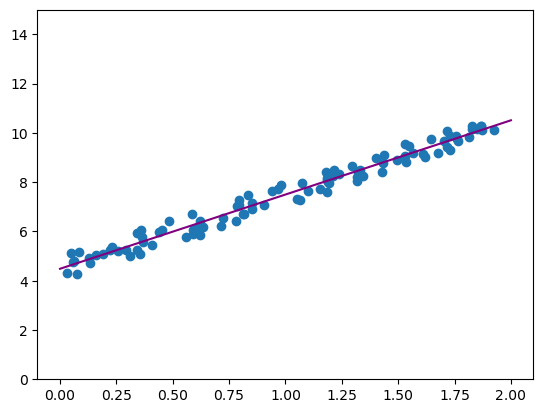

In [4]:
plt.scatter(X, y)
plt.ylim([0, 15])
x = np.linspace(0, 2, 100)
plt.plot(x, theta_best[0] + theta_best[1] * x, color='purple')

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.4846742 ],
       [10.51064424]])

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.4846742]), array([[3.01298502]]))

In [7]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for _ in range(n_iterations):
  grad = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * grad

theta

array([[4.4846742 ],
       [3.01298502]])

In [8]:
n_epochs = 50
t_0, t_1 = 5, 50

def learning_schedule(t):
  return t_0 / (t + t_1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    x_i = X_b[random_index:random_index + 1]
    y_i = y[random_index:random_index + 1]
    gradients = 2 * x_i.T.dot(x_i.dot(theta) - y_i)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

theta

array([[4.49838929],
       [3.01437424]])

In [9]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.45288641]), array([3.00291578]))

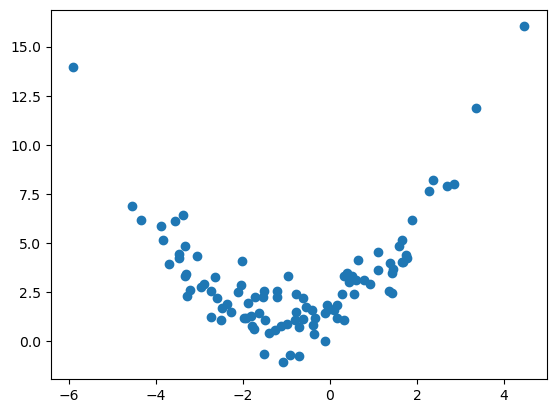

In [10]:
m = 100
X = 2 * np.random.randn(m, 1) - 1
y = 0.5 * X**2 + X + 2 + 1 * np.random.randn(m, 1)

plt.scatter(X, y)
# plt.xlim([-3, 3])

In [11]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [12]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.65627126]), array([[1.03035558, 0.51199907]]))

In [13]:
features = np.linspace((0, 10), (10, 0), 11)
poly_features.fit_transform(features)

array([[  0.,  10.,   0.,   0., 100.],
       [  1.,   9.,   1.,   9.,  81.],
       [  2.,   8.,   4.,  16.,  64.],
       [  3.,   7.,   9.,  21.,  49.],
       [  4.,   6.,  16.,  24.,  36.],
       [  5.,   5.,  25.,  25.,  25.],
       [  6.,   4.,  36.,  24.,  16.],
       [  7.,   3.,  49.,  21.,   9.],
       [  8.,   2.,  64.,  16.,   4.],
       [  9.,   1.,  81.,   9.,   1.],
       [ 10.,   0., 100.,   0.,   0.]])

## Iris Verginica type classifier
Classify based only on petal width

In [14]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [15]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [16]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [17]:
X = iris["data"][:, 3:] # Petal width
y = (iris["target"] == 2).astype(int)

In [18]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

Text(0, 0.5, 'Probability')

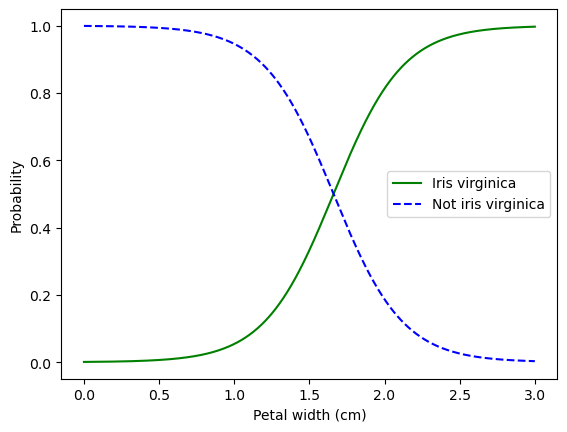

In [19]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], 'b--', label="Not iris virginica")
plt.legend()
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")